**Задание 1.** Изучение набора данных

In [714]:
import pandas as pd
import numpy as np


df = pd.read_csv('autos.csv', encoding='ISO-8859-1')

In [715]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [716]:
cols = df.columns
for i in cols:
    print(i)

dateCrawled
name
seller
offerType
price
abtest
vehicleType
yearOfRegistration
gearbox
powerPS
model
kilometer
monthOfRegistration
fuelType
brand
notRepairedDamage
dateCreated
nrOfPictures
postalCode
lastSeen


dateCrawled : при первом просмотре этого объявления все значения полей были взяты из этой даты          
name : "имя" автомобиля         
seller : частное лицо или дилер         
offerType: тип предложения (Angebot)            
price : цена, указанная в объявлении о продаже автомобиля           
abtest: проверка(?) (test)                
vehicleType: тип кузова     
yearOfRegistration : в каком году автомобиль был впервые зарегистрирован        
gearbox: тип коробки передач (автомат, механика)        
powerPS : мощность авто в PS        
model: модель       
kilometer : сколько километров проехал автомобиль       
monthOfRegistration : в какой месяц машина первый раз была зарегестрирована     
fuelType: тип топлива       
brand: бренд        
notRepairedDamage : есть ли у автомобиля повреждения, которые не отемонтированы     
dateCreated : дата, когда было создано объявление на eBay       
nrOfPictures : количество фотографий в объявлении (unfortunately this field contains everywhere a 0 and is thus useless (bug in crawler!) ) – к сожалению это поле везде имеет 0, а значит бесполезно, это изз за ошибки краулера.
postalCode: почтовый индекс     
lastSeenOnline : когда краулер (поисковой робот) последний раз видел это объявление онлайн      


In [717]:
null_counts = df.isnull().sum()
null_counts = null_counts.sort_values(ascending=False)
null_counts

notRepairedDamage      72060
vehicleType            37869
fuelType               33386
model                  20484
gearbox                20209
seller                     0
name                       0
dateCrawled                0
offerType                  0
abtest                     0
yearOfRegistration         0
price                      0
kilometer                  0
powerPS                    0
monthOfRegistration        0
brand                      0
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [718]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

**Задание 2.** Проанализировать колонки ии сделать вывод, в какой колонке находится целевое значение. 

Из названия колонок видно, что большая часть колонок - это характеристики конкретного автомобиля. Смысла пресказывать количество лошадиных сил или цвет кузова - нет. Поэтому единственным вариантом, что нужнон предсказывать остаётся только колонка **price**. Её и будет предсказывать будущая модель

**Задание 3.** Удалите дубликаты строк в наборе данных. Привести размер набора данных до и после этой операции

In [719]:
start = df.shape[0]  # before deleting

In [720]:
df = df.drop_duplicates()
end = df.shape[0]

In [721]:
print(f'Размер датасета до удаления дубликатов: {start}\nРазмер датасета после удаления дубликатов {end}\nУдалено строк: {start - end}')

Размер датасета до удаления дубликатов: 371528
Размер датасета после удаления дубликатов 371524
Удалено строк: 4


Как видно, в датасете было 4 дубликата. Было удалено 4 строк

**Задание 4.** Удалите выбросы из числовых данных. Используйте критерий 1.5-межквантильного интервала. Приведите диаграммы BoxPlot до и после удаления выбросов.

Перед удалением выбросов, для начала стоит предобработать данные - заполнить NaN Значения. Их слишком много

In [722]:
null_counts = df.isnull().sum()
null_counts = null_counts.sort_values(ascending=False)
null_counts

notRepairedDamage      72060
vehicleType            37869
fuelType               33386
model                  20484
gearbox                20209
seller                     0
name                       0
dateCrawled                0
offerType                  0
abtest                     0
yearOfRegistration         0
price                      0
kilometer                  0
powerPS                    0
monthOfRegistration        0
brand                      0
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

Из документации к датасету, мы знаем, что колонка nrOfPictures одинаковая, а значит и смысла в ней нет никакого - удаляем.

In [723]:
df = df.drop('nrOfPictures', axis=1)

In [724]:
def replace_notRepairedDamage(name):
    if name == "ja":
        return -1
    elif name == "nein":
        return 1
    else:
        return 0

df['notRepairedDamage'] = df['notRepairedDamage'].apply(str).apply(replace_notRepairedDamage)

In [725]:
df['gearbox'].unique()

array(['manuell', 'automatik', nan], dtype=object)

In [726]:
# Лучше заменить значения на 1 или -1
def replace_gearbox(name):
    if name == 'manuell':
        return -1
    elif name == 'automatik':
        return 1
    else:
        return 0


df['gearbox'] = df['gearbox'].replace({'manuell': -1, 'automatik': 1, 'nan': 0})
df.head()

C:\Users\1\AppData\Local\Temp\ipykernel_12184\3795657888.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gearbox'] = df['gearbox'].replace({'manuell': -1, 'automatik': 1, 'nan': 0})


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,-1.0,0,golf,150000,0,benzin,volkswagen,0,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,-1.0,190,NaN,125000,5,diesel,audi,-1,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,1.0,163,grand,125000,8,diesel,jeep,0,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,-1.0,75,golf,150000,6,benzin,volkswagen,1,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,-1.0,69,fabia,90000,7,diesel,skoda,1,2016-03-31 00:00:00,60437,2016-04-06 10:17:21


In [727]:
df['abtest'].unique()

array(['test', 'control'], dtype=object)

In [728]:
start = df.shape[0]
df = df.dropna()
end = df.shape[0]
print(f'до удаления: {start}\nпосле удаления: {end}\nУдалено: {start - end}')

до удаления: 371524
после удаления: 299860
Удалено: 71664


In [729]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299860 entries, 2 to 371527
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          299860 non-null  object 
 1   name                 299860 non-null  object 
 2   seller               299860 non-null  object 
 3   offerType            299860 non-null  object 
 4   price                299860 non-null  int64  
 5   abtest               299860 non-null  object 
 6   vehicleType          299860 non-null  object 
 7   yearOfRegistration   299860 non-null  int64  
 8   gearbox              299860 non-null  float64
 9   powerPS              299860 non-null  int64  
 10  model                299860 non-null  object 
 11  kilometer            299860 non-null  int64  
 12  monthOfRegistration  299860 non-null  int64  
 13  fuelType             299860 non-null  object 
 14  brand                299860 non-null  object 
 15  notRepairedDamage    2

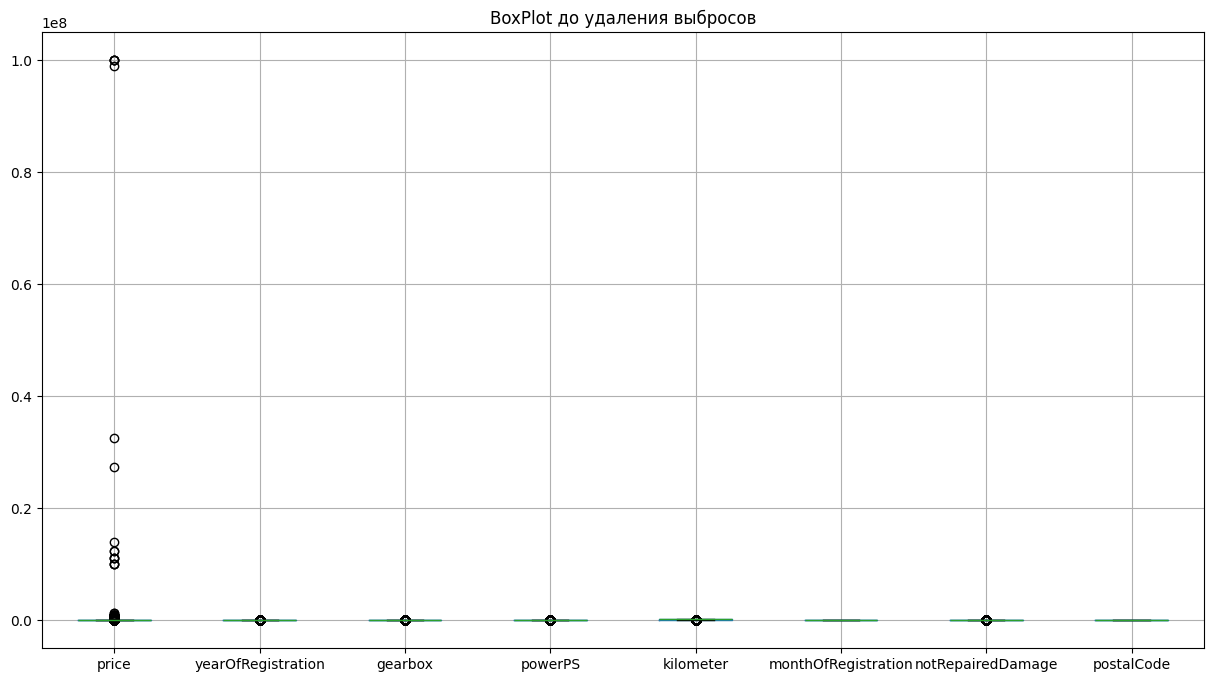

In [730]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['price', 'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'notRepairedDamage', 'postalCode']


plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot()
plt.title('BoxPlot до удаления выбросов')
plt.show()

Как видно, в колонке price есть слишком огромные значения. Цена, равная 10**8 , является выбросом, поскольку она более, чем в 100 раз превышает среднее значение цены.

In [731]:
start = df.shape[0]
df_new = df[df['price'] < 13600]
end = df_new.shape[0]
deleted = start - end
print(f'удалено: {deleted}')

удалено: 36542


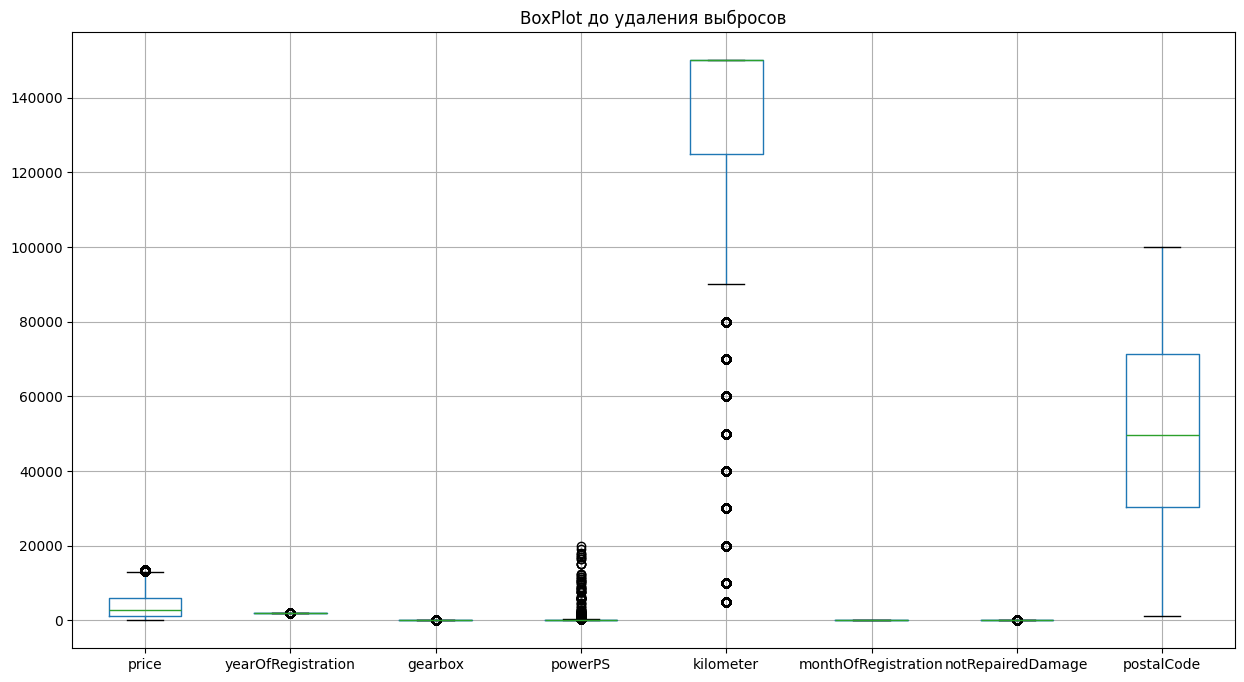

In [732]:
numeric_cols = ['price', 'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'notRepairedDamage', 'postalCode']


plt.figure(figsize=(15, 8))
df_new[numeric_cols].boxplot()
plt.title('BoxPlot до удаления выбросов')
plt.show()

In [733]:
df_new.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,1.0,163,grand,125000,8,diesel,jeep,0,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,-1.0,75,golf,150000,6,benzin,volkswagen,1,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,-1.0,69,fabia,90000,7,diesel,skoda,1,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,-1.0,102,3er,150000,10,benzin,bmw,-1,2016-04-04 00:00:00,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,-1.0,109,2_reihe,150000,8,benzin,peugeot,1,2016-04-01 00:00:00,67112,2016-04-05 18:18:39


Уже неплохо. Удалять выбросы в колонке kilometer смысла нет, потому что машины могут продавать как через 10 лет после покупки (много тысяч километров пробег), так и через пару месяцев после покупки (максимум пару десятков тысяч километров)

In [734]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [784]:
# применяем на всё, кроме kilometer
clean_data = df_new.copy()

numeric_cols = [col for col in df_new.select_dtypes(include=[np.number]).columns 
               if col not in ['kilometer', 'gearbox']]

for column in numeric_cols:
    clean_data = remove_outliers(clean_data, column)

In [785]:
df_new.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,1.0,163,grand,125000,8,diesel,jeep,0,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,-1.0,75,golf,150000,6,benzin,volkswagen,1,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,-1.0,69,fabia,90000,7,diesel,skoda,1,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,-1.0,102,3er,150000,10,benzin,bmw,-1,2016-04-04 00:00:00,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,-1.0,109,2_reihe,150000,8,benzin,peugeot,1,2016-04-01 00:00:00,67112,2016-04-05 18:18:39


In [788]:
clean_data['gearbox'].unique()

array([-1.,  1.])

array([-1.])

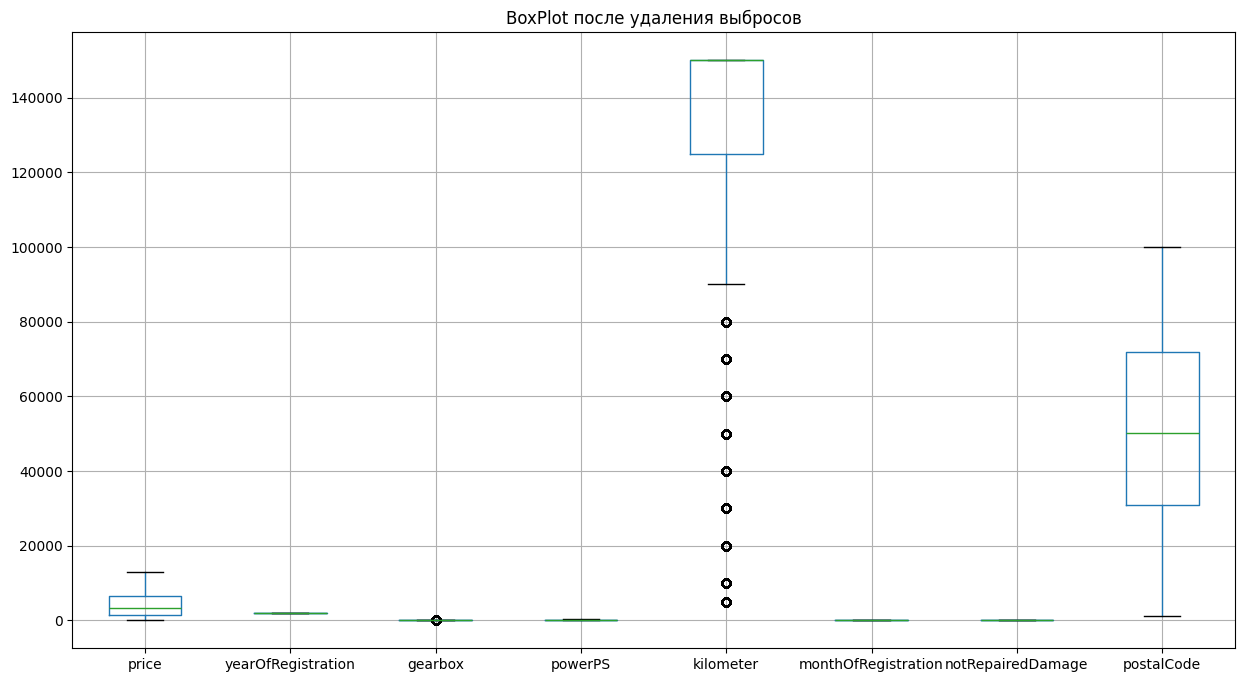

In [789]:
numeric_cols = [col for col in df_new.select_dtypes(include=[np.number]).columns]


plt.figure(figsize=(15, 8))
clean_data[numeric_cols].boxplot()
plt.title('BoxPlot после удаления выбросов')
plt.show()

**Задание 5.**	Оцените корреляцию между числовыми признаками, постройте матрицу корреляции. Найдите признаки, которые коррелируют с наибольшим числом других и выпишите их >|0.5| (все кроме целевой колонки).

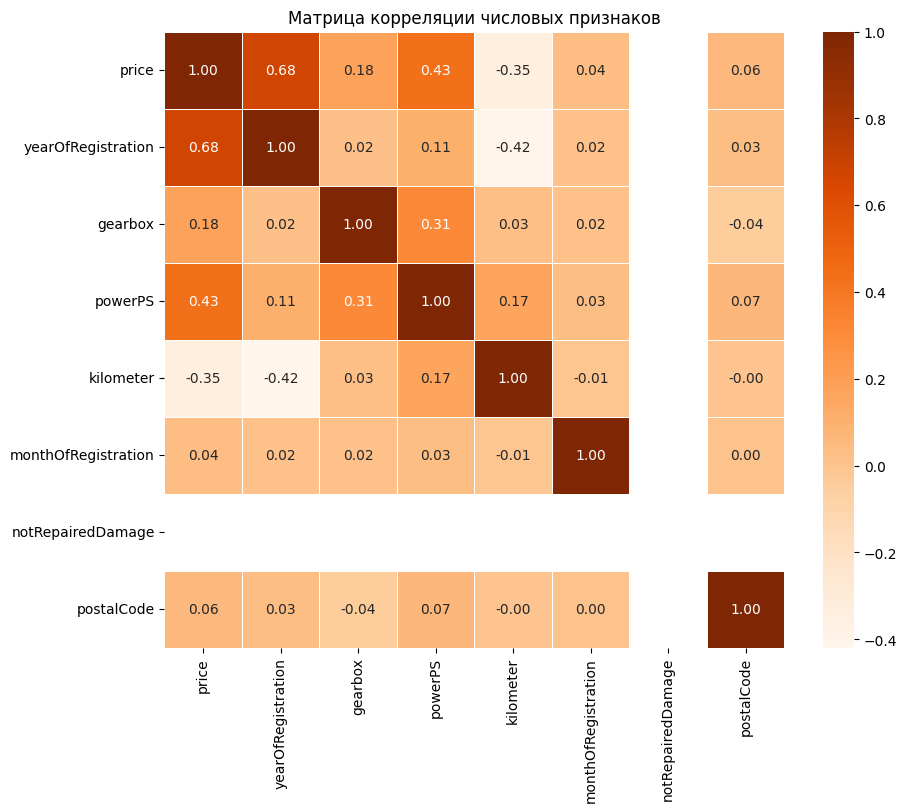

In [790]:
df_corr = clean_data[numeric_cols]
corr_matrix = df_corr.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,     
    fmt=".2f",      
    cmap="Oranges",   
    linewidths=0.5  
)
plt.title("Матрица корреляции числовых признаков")
plt.show()

Из матрицы корреляции видно, что есть две колонки, которые коррелируют с большим числом други (не считаю целевую). Это колонки yearOfRegistration и powerPS

Описание корреляций: price и yearOfRegistration: 0.7. Чем новее автомобиль, тем выше его цена. Это логично, тк новые машины обычно дороже.                         price и powerPS: 0.40. Более мощные автомобили стоят дороже.                    price и kilometer: -0.4. Чем больше пробег, тем ниже цена - логично                    price и notRepairedDamage: -0.2. Если в автомобиле есть неисправности, то это снижает цену.                    monthOfRegistration и postalCode почти не коррелируют с другими признаками. Это тоже логично! Месяц регистрации не так важен, как год, а почтовый индекс вообще никому не нужен. Поэтому эти колонки можно смело удалять

In [791]:
cols_to_drop = ['monthOfRegistration', 'postalCode']
clean_data = clean_data.drop(cols_to_drop, axis=1)

**Задание 6.**	Проанализируйте колонки на наличие нулевых значений. Выведите количество нулевых по каждой колонке.

In [792]:
null_counts = clean_data.isnull().sum()
print(f'Количество нулевых значение по колонкам:')
null_counts

Количество нулевых значение по колонкам:


dateCrawled           0
name                  0
seller                0
offerType             0
price                 0
abtest                0
vehicleType           0
yearOfRegistration    0
gearbox               0
powerPS               0
model                 0
kilometer             0
fuelType              0
brand                 0
notRepairedDamage     0
dateCreated           0
lastSeen              0
dtype: int64

В процессе предобработки данных все нулевые значения были удалены или заменены

**Задание 7.**	Проанализируйте почему в той или иной колонке могут присутствовать нулевые значения.

Было очень много нулевых значений в колонке price. Это можно объяснить тем, что при процессе продажи продавцы договариваются с покупателем о каких-то условиях и, чтобы формально сделка состоялась, прибегают к сильному снижению цен. Иногда даже до нуля. (Предположил на основе того, что зна. и видел на авито). Также иногда производится обмен автомбилями, что и означает нулевую цену.

**Задание 8.**	Выполните удаление столбцов с большим количеством нулевых значений, где это возможно, используйте Imputers для числовых колонок.

Уже выполнено

**Задание 9.**	Выполните масштабирование количественных (числовых) признаков: 

a.	Постройте диаграммы BoxPlot для признаков до масштабирования. 

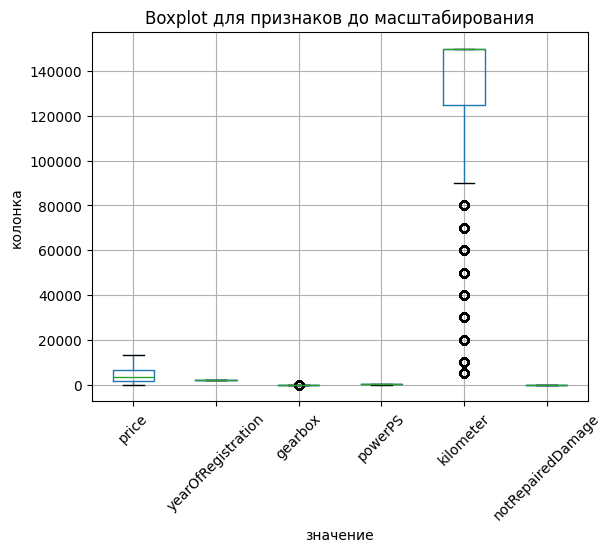

In [793]:
numeric_cols = ['price', 'yearOfRegistration', 'gearbox', 'powerPS', 'kilometer', 'notRepairedDamage']

clean_data.boxplot(column=numeric_cols)
plt.title('Boxplot для признаков до масштабирования')
plt.ylabel('колонка')
plt.xlabel('значение')
plt.xticks(rotation=45)

plt.show()

Построим ещё один график, но без kilometer и price, чтобы посмотреть на остальные фичи

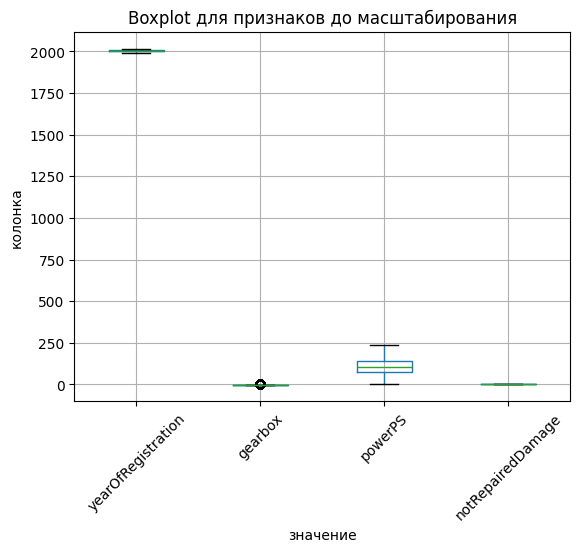

In [794]:
numeric_cols = ['yearOfRegistration', 'gearbox', 'powerPS', 'notRepairedDamage']

clean_data.boxplot(column=numeric_cols)
plt.title('Boxplot для признаков до масштабирования')
plt.ylabel('колонка')
plt.xlabel('значение')
plt.xticks(rotation=45)

plt.show()

b.	Выберите способ масштабирования (например, нормализацию или стандартизацию MinMaxScaler, StandardScaler)

Для выбранного варианта в задании написано, что позже нужно будет использовать классификаторы Lasso и Ridge. Поэтому наилучший вариант масштабирования - StandardScaler. Почему? потому что регуляризация зависит от масштаба признаков. Оба классификатора чувствительны к масштабу признаков: признаки с большим диапазоном значний получат ноправданно большоие или маленькие коэффициенты. На категориальные признаки лучше будет накинуть OHE, потому что данные будут уже в нужном масштабе (1 и 0)

c.	Выполните масштабирование выбранным методом

In [795]:
from sklearn.preprocessing import StandardScaler


numeric_cols = clean_data.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop('price')  # потому что price - целевая колонка. Её не нужно стандартизировать.
numeric_cols = numeric_cols.drop('notRepairedDamage')
numeric_cols = numeric_cols.drop('gearbox')
y = clean_data['price']

scaler = StandardScaler()
clean_data[numeric_cols] = scaler.fit_transform(clean_data[numeric_cols])

d.	Постройте диаграммы BoxPlot для признаков после масштабирования. 

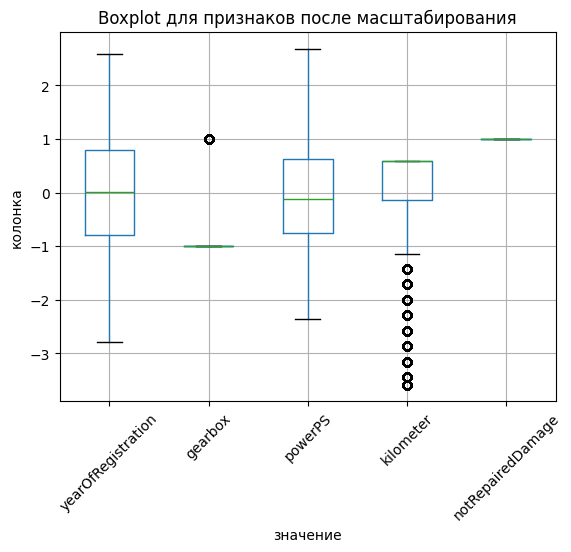

In [796]:
# целевуюю колонку убираем, потому что на неё не был накинут скалер
numeric_cols = ['yearOfRegistration', 'gearbox', 'powerPS', 'kilometer', 'notRepairedDamage']

clean_data.boxplot(column=numeric_cols)
plt.title('Boxplot для признаков после масштабирования')
plt.ylabel('колонка')
plt.xlabel('значение')
plt.xticks(rotation=45)

plt.show()

In [797]:
# заменим выброс noRepairedDamage. В колонке может быть всего 2 значени - 0 и 1. Другое - это NaN значение. Заменю его на -1
clean_data['notRepairedDamage']

3         1
4         1
6         1
10        1
17        1
         ..
371517    1
371518    1
371521    1
371524    1
371525    1
Name: notRepairedDamage, Length: 189618, dtype: int64

**Задание 10.**	Выполните замену категориальных признаков; выберите и обоснуйте способ замены (one hot encoder, label encoder);

Как уже было сказано выше, лучше использовать OHE

In [798]:
cols_to_drop = ['lastSeen', 'dateCreated', 'dateCrawled']
clean_data = clean_data.drop(cols_to_drop, axis=1)

In [799]:
clean_data['seller'] = clean_data['seller'].replace({'privat': 1, 'gewerblich': 0})
clean_data = clean_data.rename(columns={'seller': 'is_privat'})

# также было замечено, что большая часть колонки seller = privat. Других значений всего 5. Это делает данную колонку бесполезной

C:\Users\1\AppData\Local\Temp\ipykernel_12184\198896537.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_data['seller'] = clean_data['seller'].replace({'privat': 1, 'gewerblich': 0})


In [800]:
clean_data = clean_data.drop('is_privat', axis=1)

In [801]:
clean_data['vehicleType'].unique()
# К этой колонке применим OHE

array(['kleinwagen', 'cabrio', 'limousine', 'bus', 'coupe', 'andere',
       'kombi', 'suv'], dtype=object)

In [802]:
from sklearn.preprocessing import OneHotEncoder


col_ohe = clean_data[['vehicleType']]
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_array = encoder.fit_transform(col_ohe)

encoded_df = pd.DataFrame(
    encoded_array, 
    columns=encoder.get_feature_names_out(['vehicleType'])
)


df_final = pd.concat([clean_data.drop('vehicleType', axis=1), encoded_df], axis=1)

df_final.head()

,name,offerType,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv
3,GOLF_4_1_4__3TÜRER,Angebot,1500.0,test,-0.393648,-1.0,-0.756832,golf,0.586671,benzin,volkswagen,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Skoda_Fabia_1.4_TDI_PD_Classic,Angebot,3600.0,test,0.996818,-1.0,-0.884237,fabia,-1.137860,diesel,skoda,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,Peugeot_206_CC_110_Platinum,Angebot,2200.0,test,0.202266,-1.0,-0.034866,2_reihe,0.586671,benzin,peugeot,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10,Mazda_3_1.6_Sport,Angebot,2000.0,control,0.202266,-1.0,-0.119803,3_reihe,0.586671,benzin,mazda,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17,Renault_Twingo_1.2_16V_Aut.,Angebot,1750.0,control,0.202266,1.0,-0.756832,twingo,0.586671,benzin,renault,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [803]:
# после применения функции сверху, в датсете стало на 100к больше строк. Я обратился в интернет за помощью:
clean_data = clean_data.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)
df_final = pd.concat([clean_data.drop('vehicleType', axis=1), encoded_df], axis=1)

In [804]:
print(clean_data.index.equals(encoded_df.index))

True


In [805]:
df_final['abtest'].unique()

array(['test', 'control'], dtype=object)

In [806]:
clean_data.shape[0]

189618

In [807]:
df_final.shape[0]

189618

In [808]:
df_final['abtest'].isnull().sum()
# нужно заменить nan значения

np.int64(0)

In [809]:
# заполнение модой
df_final['abtest'] = df_final['abtest'].fillna(df_final['abtest'].mode()[0])

In [810]:
df_final['abtest'] = df_final['abtest'].replace({'test': 1, 'control': 0}) 

C:\Users\1\AppData\Local\Temp\ipykernel_12184\3975137877.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final['abtest'] = df_final['abtest'].replace({'test': 1, 'control': 0})


In [811]:
df_final.tail()

,name,offerType,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv
189613,Volkswagen_Golf_2.0_TDI_DPF_Team,Angebot,7900,1,1.394094,-1.0,0.623397,golf,0.586671,diesel,volkswagen,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
189614,Bmw_320_D_DPF_Touring_!!!,Angebot,3999,1,0.400904,-1.0,-2.285700,3er,0.586671,diesel,bmw,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
189615,Opel_Zafira_1.6_Elegance_TÜV_12/16,Angebot,1150,0,-0.592286,-1.0,-2.349403,zafira,0.586671,benzin,opel,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
189616,Smart_smart_leistungssteigerung_100ps,Angebot,1199,1,-0.592286,1.0,-0.204740,fortwo,-0.131883,benzin,smart,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
189617,Volkswagen_Multivan_T4_TDI_7DC_UY2,Angebot,9200,1,-1.386838,-1.0,-0.183506,transporter,0.586671,diesel,volkswagen,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [812]:
df_final['offerType'].unique()

array(['Angebot', 'Gesuch'], dtype=object)

In [813]:
df_final['offerType'] = df_final['offerType'].replace({'Angebot': 1, 'Gesuch': 0})

C:\Users\1\AppData\Local\Temp\ipykernel_12184\3163264529.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final['offerType'] = df_final['offerType'].replace({'Angebot': 1, 'Gesuch': 0})


In [814]:
df_final.tail()

,name,offerType,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv
189613,Volkswagen_Golf_2.0_TDI_DPF_Team,1,7900,1,1.394094,-1.0,0.623397,golf,0.586671,diesel,volkswagen,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
189614,Bmw_320_D_DPF_Touring_!!!,1,3999,1,0.400904,-1.0,-2.285700,3er,0.586671,diesel,bmw,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
189615,Opel_Zafira_1.6_Elegance_TÜV_12/16,1,1150,0,-0.592286,-1.0,-2.349403,zafira,0.586671,benzin,opel,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
189616,Smart_smart_leistungssteigerung_100ps,1,1199,1,-0.592286,1.0,-0.204740,fortwo,-0.131883,benzin,smart,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
189617,Volkswagen_Multivan_T4_TDI_7DC_UY2,1,9200,1,-1.386838,-1.0,-0.183506,transporter,0.586671,diesel,volkswagen,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [764]:
df_final['fuelType'].unique()  # применим OHE, тк данные без порядка

array(['benzin', 'diesel', 'lpg', 'andere', 'cng', 'elektro', 'hybrid'],
      dtype=object)

In [815]:
fuel_encoded = encoder.fit_transform(df_final[['fuelType']])
df_final = pd.concat([df_final, pd.DataFrame(fuel_encoded, columns=encoder.get_feature_names_out(['fuelType']))], axis=1)
df_final.drop('fuelType', axis=1, inplace=True)

In [816]:
df = df_final

In [817]:
df = df.drop(columns=['name', 'offerType'])

In [818]:
df.head()

,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,brand,notRepairedDamage,vehicleType_andere,...,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg
0,1500,1,-0.393648,-1.0,-0.756832,golf,0.586671,volkswagen,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,3600,1,0.996818,-1.0,-0.884237,fabia,-1.137860,skoda,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2200,1,0.202266,-1.0,-0.034866,2_reihe,0.586671,peugeot,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2000,0,0.202266,-1.0,-0.119803,3_reihe,0.586671,mazda,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1750,0,0.202266,1.0,-0.756832,twingo,0.586671,renault,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Сначала я хотел использовать LabelEncodel, но для LASSO и RIDGE это нехорошо. Реешил использовать Frequency Encoding

In [769]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df['model'] = le.fit_transform(df['model'])
# df.head(10)

In [819]:
for col in ['brand', 'model']:
    df[col] = df[col].map(df[col].value_counts(normalize=True))

In [820]:
df.head()

,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,brand,notRepairedDamage,vehicleType_andere,...,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg
0,1500,1,-0.393648,-1.0,-0.756832,0.085182,0.586671,0.215401,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,3600,1,0.996818,-1.0,-0.884237,0.008201,-1.137860,0.019059,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2200,1,0.202266,-1.0,-0.034866,0.017525,0.586671,0.034696,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2000,0,0.202266,-1.0,-0.119803,0.011360,0.586671,0.016802,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1750,0,0.202266,1.0,-0.756832,0.013949,0.586671,0.050712,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**Задание 10.** 

a.	Разделите набор данных на две выборки: обучение и тест

In [821]:
from sklearn.model_selection import train_test_split


X = df.drop('price', axis=1)
# y уже записал выше

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42)

b.	По каждому методу регрессии из задания изучите возможные для изменения параметры и их значения

Lasso (L1-регуляризация): alpha - сила регуляризации. Чем больше, тем сильнее штраф за большие коэффициенты (больше признаков обнуляется). max_inter - максимальное число итерация оптимизации. 

Ridge (L2-регуляризатор): alpha - аналогично, но коэффициента уменьшаются, а не обнуляются. solver - алгоритм оптимизации (auto, svd, cholesky)

c.	При подборе параметров модели регрессии используйте перекрёстную проверку (GridSearch CrossValidate). Обоснуйте выбор метрики для параметра refit в GridSearchCV. 

In [822]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error


param_grid = {
    'alpha': [0.001, 0.1, 1, 10, 100],
    'max_iter': [10, 40, 1000]
}

In [835]:

lasso = Lasso()
ridge = Ridge()

In [836]:
grid_lasso = GridSearchCV(estimator=lasso,
                        param_grid=param_grid, 
                        scoring={
                            'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
                            'MSR': make_scorer(mean_squared_error, greater_is_better=False)
                        },
                        refit='MAE', 
                        cv=5, 
                        return_train_score=True
                        )
grid_lasso.fit(X_train, y_train)
print(f'best params for Lasso: {grid_lasso.best_params_}')


grid_ridge = GridSearchCV(estimator=ridge,
                        param_grid=param_grid, 
                        scoring={
                            'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
                            'MSR': make_scorer(mean_squared_error, greater_is_better=False)
                        },
                        refit='MAE', 
                        cv=5, 
                        return_train_score=True
                        )
grid_ridge.fit(X_train, y_train)
print(f'best score for Ridge: {grid_ridge.best_score_}')

c:\Users\1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.804e+11, tolerance: 1.093e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.798e+11, tolerance: 1.093e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

best params for Lasso: {'alpha': 0.001, 'max_iter': 10}
best score for Ridge: -1436.6887319113955


In [837]:
y.max()

np.int64(13050)

почему было решено использовать MAE? Дело в том, что мы считаем цену автомобиля. Она может варьироватьяс от почти нулей до нескольких десятков тысяч. Таким образом, MSE будет сильно штрафовать даже за не значительные ошибки. 

In [838]:
df['gearbox'].unique()

array([-1.,  1.])

d.	Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным на тестовой выборке (MAE или MSE). 

In [840]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Предсказание для Lasso и Ridge
y_pred_lasso = grid_lasso.best_estimator_.predict(X_test)
y_pred_ridge = grid_ridge.best_estimator_.predict(X_test)

# Метрики
print("Lasso:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lasso):.7f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lasso):.7f}")

print("\nRidge:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ridge):.7f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_ridge):.7f}")

Lasso:
MAE: 1441.8484991
MSE: 3733888.1749540

Ridge:
MAE: 1441.8450434
MSE: 3733865.0451604


e.	Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным. Проанализируйте значение p-value.

In [844]:
from scipy.stats import pearsonr, spearmanr

# Lasso
pearson_corr, pearson_p = pearsonr(y_test, y_pred_lasso)
spearman_corr, spearman_p = spearmanr(y_test, y_pred_lasso)

print(f"lasso pearson: {pearson_corr:.7f}, p-value={pearson_p:.7f}")
print(f"lasso spearman: {spearman_corr:.7f}, p-value={spearman_p:.7f}\n")

# Ridge
pearson_corr, pearson_p = pearsonr(y_test, y_pred_ridge)
spearman_corr, spearman_p = spearmanr(y_test, y_pred_ridge)

print(f"ridge pearson: {pearson_corr:.7f}, p-value={pearson_p:.7f}")
print(f"ridge spearman: {spearman_corr:.7f}, p-value={spearman_p:.7f}")

lasso pearson: 0.8126409, p-value=0.0000000
lasso spearman: 0.8519579, p-value=0.0000000

ridge pearson: 0.8126423, p-value=0.0000000
ridge spearman: 0.8519596, p-value=0.0000000
